In [2]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('/content/drive/MyDrive/CSE/Data/DL_Datasets/Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.shape

(500, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [8]:
df.duplicated().sum()

0

In [11]:
df.drop(columns=['Serial No.'],inplace = True)

In [12]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [14]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [15]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [16]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [18]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
428,316,103,2,2.0,4.5,8.74,0
490,307,105,2,2.5,4.5,8.12,1
53,324,112,4,4.0,2.5,8.10,1
336,319,110,3,3.0,2.5,8.79,0
154,326,108,3,3.0,3.5,8.89,0
...,...,...,...,...,...,...,...
22,328,116,5,5.0,5.0,9.50,1
72,321,111,5,5.0,5.0,9.45,1
493,300,95,2,3.0,1.5,8.22,1
15,314,105,3,3.5,2.5,8.30,0


In [13]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
X_train_scaled

array([[0.4893617 , 0.37037037, 0.25      , ..., 0.875     , 0.62179487,
        0.        ],
       [0.29787234, 0.44444444, 0.25      , ..., 0.875     , 0.42307692,
        1.        ],
       [0.65957447, 0.7037037 , 0.75      , ..., 0.375     , 0.41666667,
        1.        ],
       ...,
       [0.14893617, 0.07407407, 0.25      , ..., 0.125     , 0.45512821,
        1.        ],
       [0.44680851, 0.44444444, 0.5       , ..., 0.375     , 0.48076923,
        0.        ],
       [0.        , 0.14814815, 0.25      , ..., 0.75      , 0.32051282,
        1.        ]])

In [22]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [23]:
model = Sequential()

In [35]:
model.add(Dense(7,activation = 'relu',input_dim = 7))
model.add(Dense(7,activation = 'relu'))
model.add(Dense(1,activation = 'linear'))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 1)                 8         
                                                                 
 dense_2 (Dense)             (None, 7)                 14        
                                                                 
 dense_3 (Dense)             (None, 7)                 56        
                                                                 
 dense_4 (Dense)             (None, 1)                 8         
                                                                 
Total params: 142 (568.00 Byte)
Trainable params: 142 (568.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
model.compile(loss = 'mean_squared_error',optimizer='Adam')

In [38]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 1s 25ms/step - loss: 1.0088 - val_loss: 0.8950
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 0.8326 - val_loss: 0.7435
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 0.6963 - val_loss: 0.6230
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.5810 - val_loss: 0.5128
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4857 - val_loss: 0.4313
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4145 - val_loss: 0.3784
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 0.3658 - val_loss: 0.3383
Epoch 8/100
10/10 [==============================] - 0s 5ms/step - loss: 0.3273 - val_loss: 0.3042
Epoch 9/100
10/10 [==============================] - 0s 7ms/step - loss: 0.2926 - val_loss: 0.2711
Epoch 10/100
10/10 [==============================] - 0s 6ms/step - loss: 0.2579 - val_loss: 0.2363
Epoch 11

In [39]:
y_predict = model.predict(X_test_scaled)

4/4 [==============================] - 0s 3ms/step


In [40]:
from sklearn.metrics import r2_score

In [41]:
r2_score(y_test,y_predict)

0.6150144045645438

In [42]:
import matplotlib.pyplot as plt

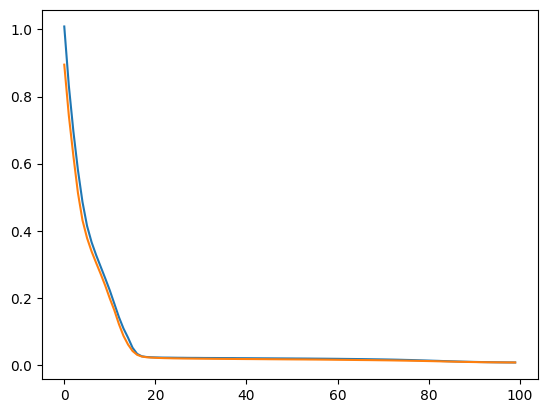

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])